In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

In [101]:
data = pd.read_csv("DataSet.csv")
data.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [102]:
#Removed id zip code ,online as they are irrevelant to our objective
data.drop(['ID', 'ZIP Code','Online'], axis=1, inplace=True)

In [103]:
data.head()


,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,25,1,49,4.0,1.6,1,0,0,1,0,0
1,45,19,34,3.0,1.5,1,0,0,1,0,0
2,39,15,11,1.0,1.0,1,0,0,0,0,0
3,35,9,100,1.0,2.7,2,0,0,0,0,0
4,35,8,45,4.0,1.0,2,0,0,0,0,1


In [104]:
# finding duplicate data and remove it
data.duplicated().sum()

29

In [105]:
data.drop_duplicates(inplace=True)

In [106]:
# Column family members have null values lets handle in below cell
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4971 entries, 0 to 4999
Data columns (total 11 columns):
Age (in years)           4971 non-null int64
Experience (in years)    4971 non-null int64
Income (in K/month)      4971 non-null int64
Family members           4953 non-null float64
CCAvg                    4971 non-null float64
Education                4971 non-null int64
Mortgage                 4971 non-null int64
Personal Loan            4971 non-null int64
Securities Account       4971 non-null int64
CD Account               4971 non-null int64
CreditCard               4971 non-null int64
dtypes: float64(2), int64(9)
memory usage: 466.0 KB
None
Age (in years)            0
Experience (in years)     0
Income (in K/month)       0
Family members           18
CCAvg                     0
Education                 0
Mortgage                  0
Personal Loan             0
Securities Account        0
CD Account                0
CreditCard                0
dtype: int64


In [107]:
# finding the correction between the features
data.corr()

,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
Age (in years),1.000000,0.994211,-0.058785,-0.044291,-0.053875,0.043493,-0.013315,-0.008178,-0.000882,0.007742,0.006190
Experience (in years),0.994211,1.000000,-0.050268,-0.050514,-0.052048,0.015349,-0.011314,-0.007844,-0.001658,0.010079,0.007462
Income (in K/month),-0.058785,-0.050268,1.000000,-0.158063,0.645897,-0.185747,0.206865,0.503341,-0.002968,0.169869,-0.003971
Family members,-0.044291,-0.050514,-0.158063,1.000000,-0.110893,0.063867,-0.020344,0.061542,0.021829,0.013958,0.009910
CCAvg,-0.053875,-0.052048,0.645897,-0.110893,1.000000,-0.133917,0.109255,0.367167,0.014527,0.136390,-0.007255
Education,0.043493,0.015349,-0.185747,0.063867,-0.133917,1.000000,-0.032189,0.137891,-0.010071,0.014552,-0.009788
Mortgage,-0.013315,-0.011314,0.206865,-0.020344,0.109255,-0.032189,1.000000,0.141210,-0.006526,0.088586,-0.008610
Personal Loan,-0.008178,-0.007844,0.503341,0.061542,0.367167,0.137891,0.141210,1.000000,0.021319,0.316030,0.002011
Securities Account,-0.000882,-0.001658,-0.002968,0.021829,0.014527,-0.010071,-0.006526,0.021319,1.000000,0.316696,-0.015896
CD Account,0.007742,0.010079,0.169869,0.013958,0.136390,0.014552,0.088586,0.316030,0.316696,1.000000,0.278581


In [108]:
# find null percentage in family members
print(data['Family members'].isnull().sum()/len(data))
mode_family_mem = data['Family members'].mode()[0]
mode_family_mem

0.003621001810500905


1.0

In [109]:
# impute null with mode for family members features
data['Family members'].fillna(mode_family_mem, inplace = True)

In [110]:
#Again check the null values
print(data.isnull().sum())

Age (in years)           0
Experience (in years)    0
Income (in K/month)      0
Family members           0
CCAvg                    0
Education                0
Mortgage                 0
Personal Loan            0
Securities Account       0
CD Account               0
CreditCard               0
dtype: int64


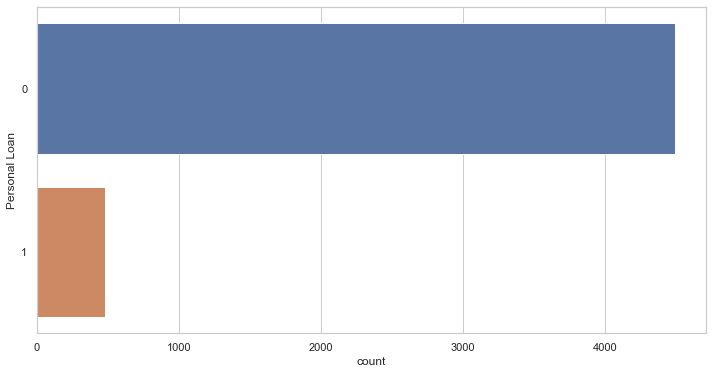

In [111]:
#data is imblanced
sns.set(style ="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(y='Personal Loan', data=data)
plt.show()

In [112]:
print(data.describe())

       Age (in years)  Experience (in years)  Income (in K/month)  \
count     4971.000000            4971.000000          4971.000000   
mean        45.353249              20.118688            73.820559   
std         11.457749              11.460807            46.071391   
min         23.000000              -3.000000             8.000000   
25%         35.000000              10.000000            39.000000   
50%         45.000000              20.000000            64.000000   
75%         55.000000              30.000000            98.000000   
max         67.000000              43.000000           224.000000   

       Family members        CCAvg    Education     Mortgage  Personal Loan  \
count     4971.000000  4971.000000  4971.000000  4971.000000    4971.000000   
mean         2.391873     1.940976     1.879099    56.828405       0.096560   
std          1.148407     1.749260     0.839941   101.918252       0.295387   
min          1.000000     0.000000     1.000000     0.000000  

In [113]:
# we have negative values in experience , we need to make it positive as experience cannot be in neagtive
data['Experience (in years)'] = data['Experience (in years)'].apply(lambda x : -x if x < 0 else x)

In [114]:
print(data.describe())

       Age (in years)  Experience (in years)  Income (in K/month)  \
count     4971.000000            4971.000000          4971.000000   
mean        45.353249              20.148863            73.820559   
std         11.457749              11.407663            46.071391   
min         23.000000               0.000000             8.000000   
25%         35.000000              10.000000            39.000000   
50%         45.000000              20.000000            64.000000   
75%         55.000000              30.000000            98.000000   
max         67.000000              43.000000           224.000000   

       Family members        CCAvg    Education     Mortgage  Personal Loan  \
count     4971.000000  4971.000000  4971.000000  4971.000000    4971.000000   
mean         2.391873     1.940976     1.879099    56.828405       0.096560   
std          1.148407     1.749260     0.839941   101.918252       0.295387   
min          1.000000     0.000000     1.000000     0.000000  

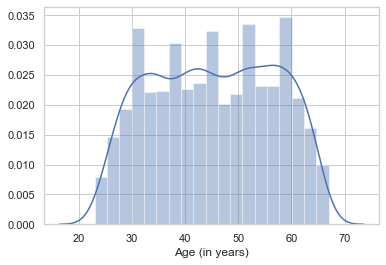

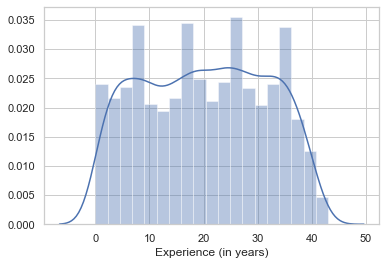

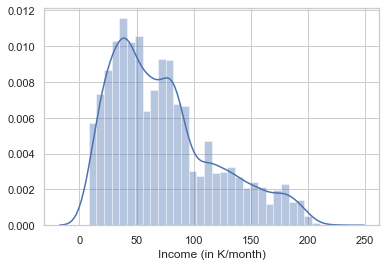

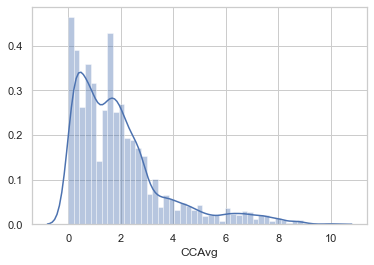

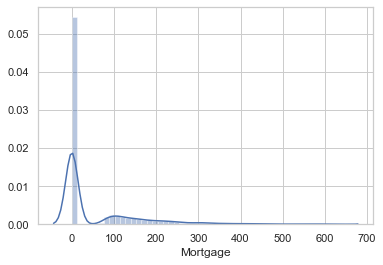

In [115]:
sns.distplot(data['Age (in years)'])
plt.show()

sns.distplot(data['Experience (in years)'])
plt.show()

sns.distplot(data['Income (in K/month)'])
plt.show()

sns.distplot(data['CCAvg'])
plt.show()

sns.distplot(data['Mortgage'])
plt.show()

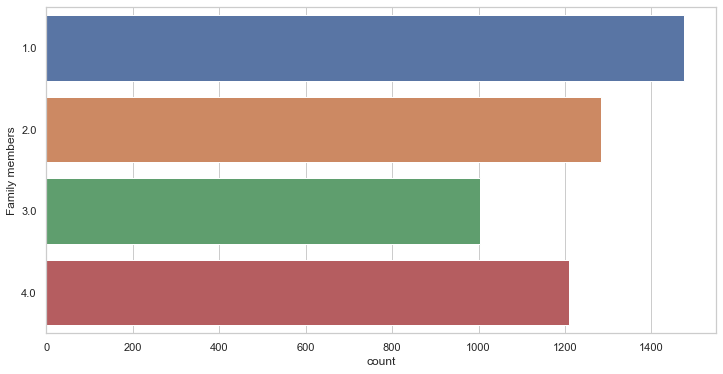

In [116]:
sns.set(style ="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(y='Family members', data=data)
plt.show()





In [ ]:
#Following inference can be observed :
#    1. Customers have family members vary from range 0 to 4 
#    2. Most of the customers are Undergrad
#    3. Most of the customes do not have Securities Account and CD Account
#    4. Most of the customes do not opt for Credit Card


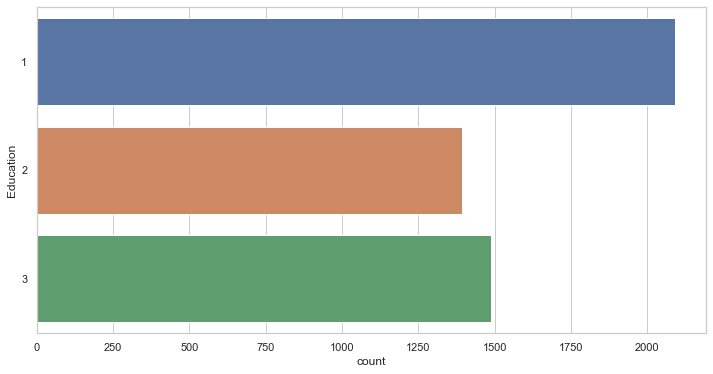

In [117]:
sns.set(style ="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(y='Education', data=data)
plt.show()

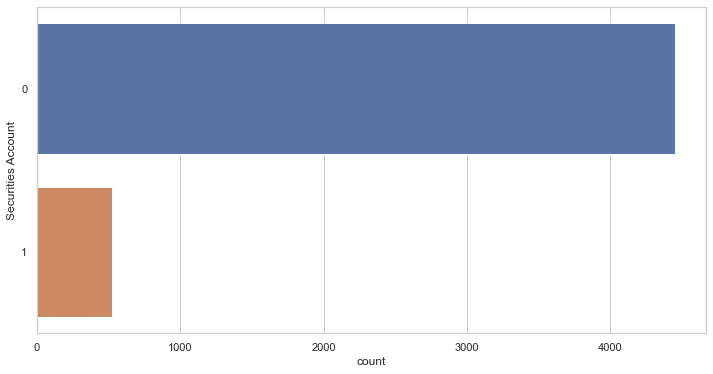

In [118]:
sns.set(style ="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(y='Securities Account', data=data)
plt.show()

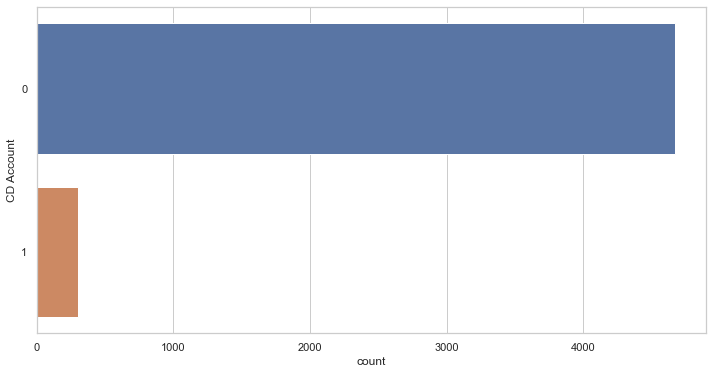

In [119]:
sns.set(style ="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(y='CD Account', data=data)
plt.show()

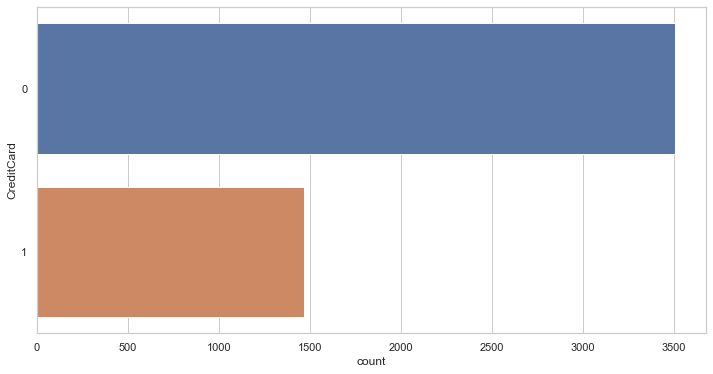

In [120]:
sns.set(style ="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(y='CreditCard', data=data)
plt.show()

In [83]:
#create graphs for features with target feature - Personal Loan


<AxesSubplot:xlabel='Family members'>

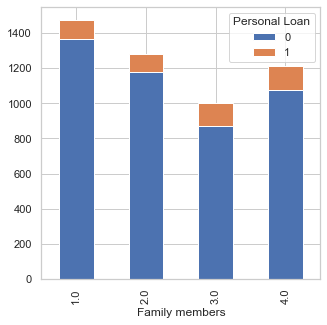

In [122]:
data.groupby('Family members')['Personal Loan'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
# more family member - more chances to take Personal loan

<AxesSubplot:xlabel='Education'>

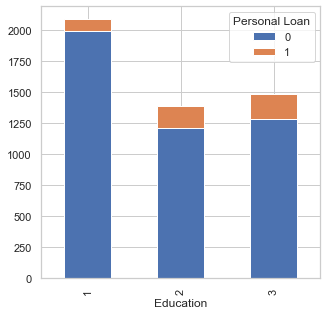

In [123]:
data.groupby('Education')['Personal Loan'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
# highly educated prefer to take Personal

Text(0, 0.5, 'Percentage')

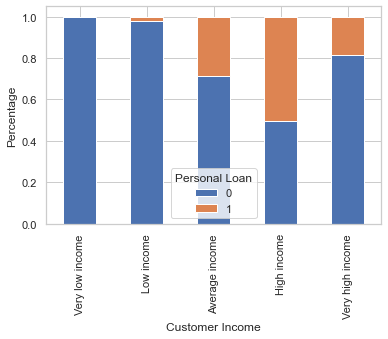

In [124]:
bins = [0,50,100,150,200,250]
group=['Very low income','Low income','Average income','High income','Very high income']
data['Income_bin'] = pd.cut(data['Income (in K/month)'],bins,labels=group)
Income_bin = pd.crosstab(data['Income_bin'],data['Personal Loan'])
Income_bin.div(Income_bin.sum(1).astype(float),axis =0).plot(kind = "bar"
                                                            ,stacked=True)
plt.xlabel('Customer Income')
plt.ylabel('Percentage')

# observation : only average , high , very high prefer the personal loan

Text(0, 0.5, 'Percentage')

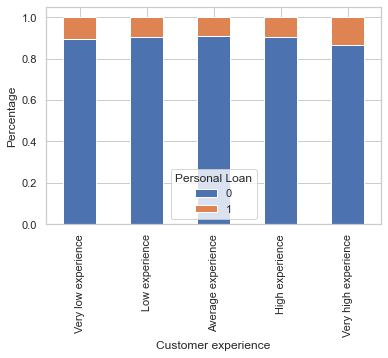

In [20]:
bins = [0,10,20,30,40,50]
group=['Very low experience','Low experience','Average experience','High experience','Very high experience']
data['experience_bin'] = pd.cut(data['Experience (in years)'],bins,labels=group)
Income_bin = pd.crosstab(data['experience_bin'],data['Personal Loan'])
Income_bin.div(Income_bin.sum(1).astype(float),axis =0).plot(kind = "bar"
                                                            ,stacked=True)
plt.xlabel('Customer experience')
plt.ylabel('Percentage')

# observation : all level of experience custome prefer the personal loan

Text(0, 0.5, 'Percentage')

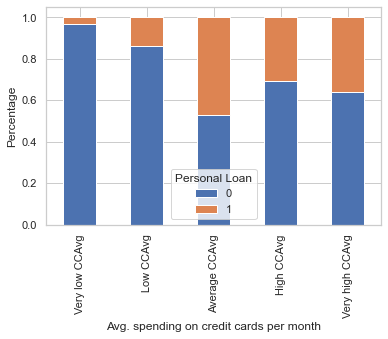

In [125]:
bins = [0,2,4,6,8,10]
group=['Very low CCAvg','Low CCAvg','Average CCAvg','High CCAvg','Very high CCAvg']
data['CCAvg_bin'] = pd.cut(data['CCAvg'],bins,labels=group)
Income_bin = pd.crosstab(data['CCAvg_bin'],data['Personal Loan'])
Income_bin.div(Income_bin.sum(1).astype(float),axis =0).plot(kind = "bar"
                                                            ,stacked=True)
plt.xlabel('Avg. spending on credit cards per month')
plt.ylabel('Percentage')

# observation :  average , high , very high more prefer the personal loan

In [22]:
data.drop(['Income_bin','experience_bin','CCAvg_bin'], axis = 1, inplace = True)

In [23]:
# Apply filter methods
# finding the correction between the features
# 1. correlation
# note Age and Experience feature are highly correlated, Hence droping Age factor
data.corr()

,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
Age (in years),1.000000,0.993986,-0.058785,-0.045311,-0.053875,0.043493,-0.013315,-0.008178,-0.000882,0.007742,0.006190
Experience (in years),0.993986,1.000000,-0.050592,-0.050483,-0.051722,0.016137,-0.011844,-0.008745,-0.001421,0.009453,0.007332
Income (in K/month),-0.058785,-0.050592,1.000000,-0.158473,0.645897,-0.185747,0.206865,0.503341,-0.002968,0.169869,-0.003971
Family members,-0.045311,-0.050483,-0.158473,1.000000,-0.109035,0.063520,-0.019678,0.061034,0.020825,0.012947,0.010034
CCAvg,-0.053875,-0.051722,0.645897,-0.109035,1.000000,-0.133917,0.109255,0.367167,0.014527,0.136390,-0.007255
Education,0.043493,0.016137,-0.185747,0.063520,-0.133917,1.000000,-0.032189,0.137891,-0.010071,0.014552,-0.009788
Mortgage,-0.013315,-0.011844,0.206865,-0.019678,0.109255,-0.032189,1.000000,0.141210,-0.006526,0.088586,-0.008610
Personal Loan,-0.008178,-0.008745,0.503341,0.061034,0.367167,0.137891,0.141210,1.000000,0.021319,0.316030,0.002011
Securities Account,-0.000882,-0.001421,-0.002968,0.020825,0.014527,-0.010071,-0.006526,0.021319,1.000000,0.316696,-0.015896
CD Account,0.007742,0.009453,0.169869,0.012947,0.136390,0.014552,0.088586,0.316030,0.316696,1.000000,0.278581


In [24]:
data.drop(['Age (in years)'], axis = 1, inplace = True)
data.head()

,Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,1,49,4.0,1.6,1,0,0,1,0,0
1,19,34,3.0,1.5,1,0,0,1,0,0
2,15,11,1.0,1.0,1,0,0,0,0,0
3,9,100,1.0,2.7,2,0,0,0,0,0
4,8,45,4.0,1.0,2,0,0,0,0,1


In [25]:
df=data[['Family members','Education','Securities Account','CD Account','CreditCard','Personal Loan']]
df.head()

,Family members,Education,Securities Account,CD Account,CreditCard,Personal Loan
0,4.0,1,1,0,0,0
1,3.0,1,1,0,0,0
2,1.0,1,0,0,0,0
3,1.0,2,0,0,0,0
4,4.0,2,0,0,1,0


In [26]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Family members','Education','Securities Account','CD Account','CreditCard']],
                                              df['Personal Loan'],test_size=0.3,random_state=100)

In [27]:
X_train.head()

,Family members,Education,Securities Account,CD Account,CreditCard
884,2.0,2,0,0,0
4345,2.0,3,0,1,1
434,1.0,2,0,0,0
2598,1.0,1,0,0,0
4754,2.0,1,0,0,0


In [28]:
## Perform chi2 test
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values
p_values.sort_index(ascending=False)

Securities Account    1.434124e-01
Family members        3.307308e-03
Education             3.452821e-07
CreditCard            4.786467e-01
CD Account            4.545615e-87
dtype: float64

In [ ]:
#Observation
#Securities Account Column is the most important column when compared to the output feature Personal Loan
# credit card will be drop because it has inconsitancy with feature CCAvg
# CD Account least important hence dropping this feature as well

In [29]:
data.drop(['CreditCard','CD Account'], axis = 1, inplace = True)

In [30]:
y = data['Personal Loan']
X = data.drop(['Personal Loan'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Securities Account
3677,33,43,2.0,0.3,1,0,0
4316,6,95,2.0,0.2,1,0,1
3926,23,43,2.0,1.3,1,0,0
80,36,41,4.0,1.3,1,174,0
805,29,132,3.0,5.9,2,307,0


In [40]:
# Create decision tree classifer object
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth = 15)

# Train the model
dt1.fit(X_train, y_train)


# predict
y_pred = dt1.predict(X_test)

# f1 score
score = fbeta_score(y_test, y_pred, beta=2)

# print
print(score)

0.8796296296296297


In [47]:
confusion_matrix(y_test, y_pred)

array([[877,   9],
       [ 14,  95]], dtype=int64)

In [46]:
# Create decision tree classifer object
dt2 = DecisionTreeClassifier(criterion='gini',max_depth = 15)

# Train the model
dt2.fit(X_train, y_train)


# predict
y_pred_dt2 = dt2.predict(X_test)

# f1 score
score = fbeta_score(y_test, y_pred_dt2, beta=2)

# print
print(score)

0.8579335793357933


In [66]:
# hypertune dt1

# Create decision tree classifer object
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth = 15,min_samples_split=7, splitter='best',min_samples_leaf=2, random_state=42)

# Train the model
dt1.fit(X_train, y_train)


# predict
y_pred = dt1.predict(X_test)

# f1 score
score = fbeta_score(y_test, y_pred, beta=2)

# print
print(score)
#0.8796296296296297

0.892193308550186


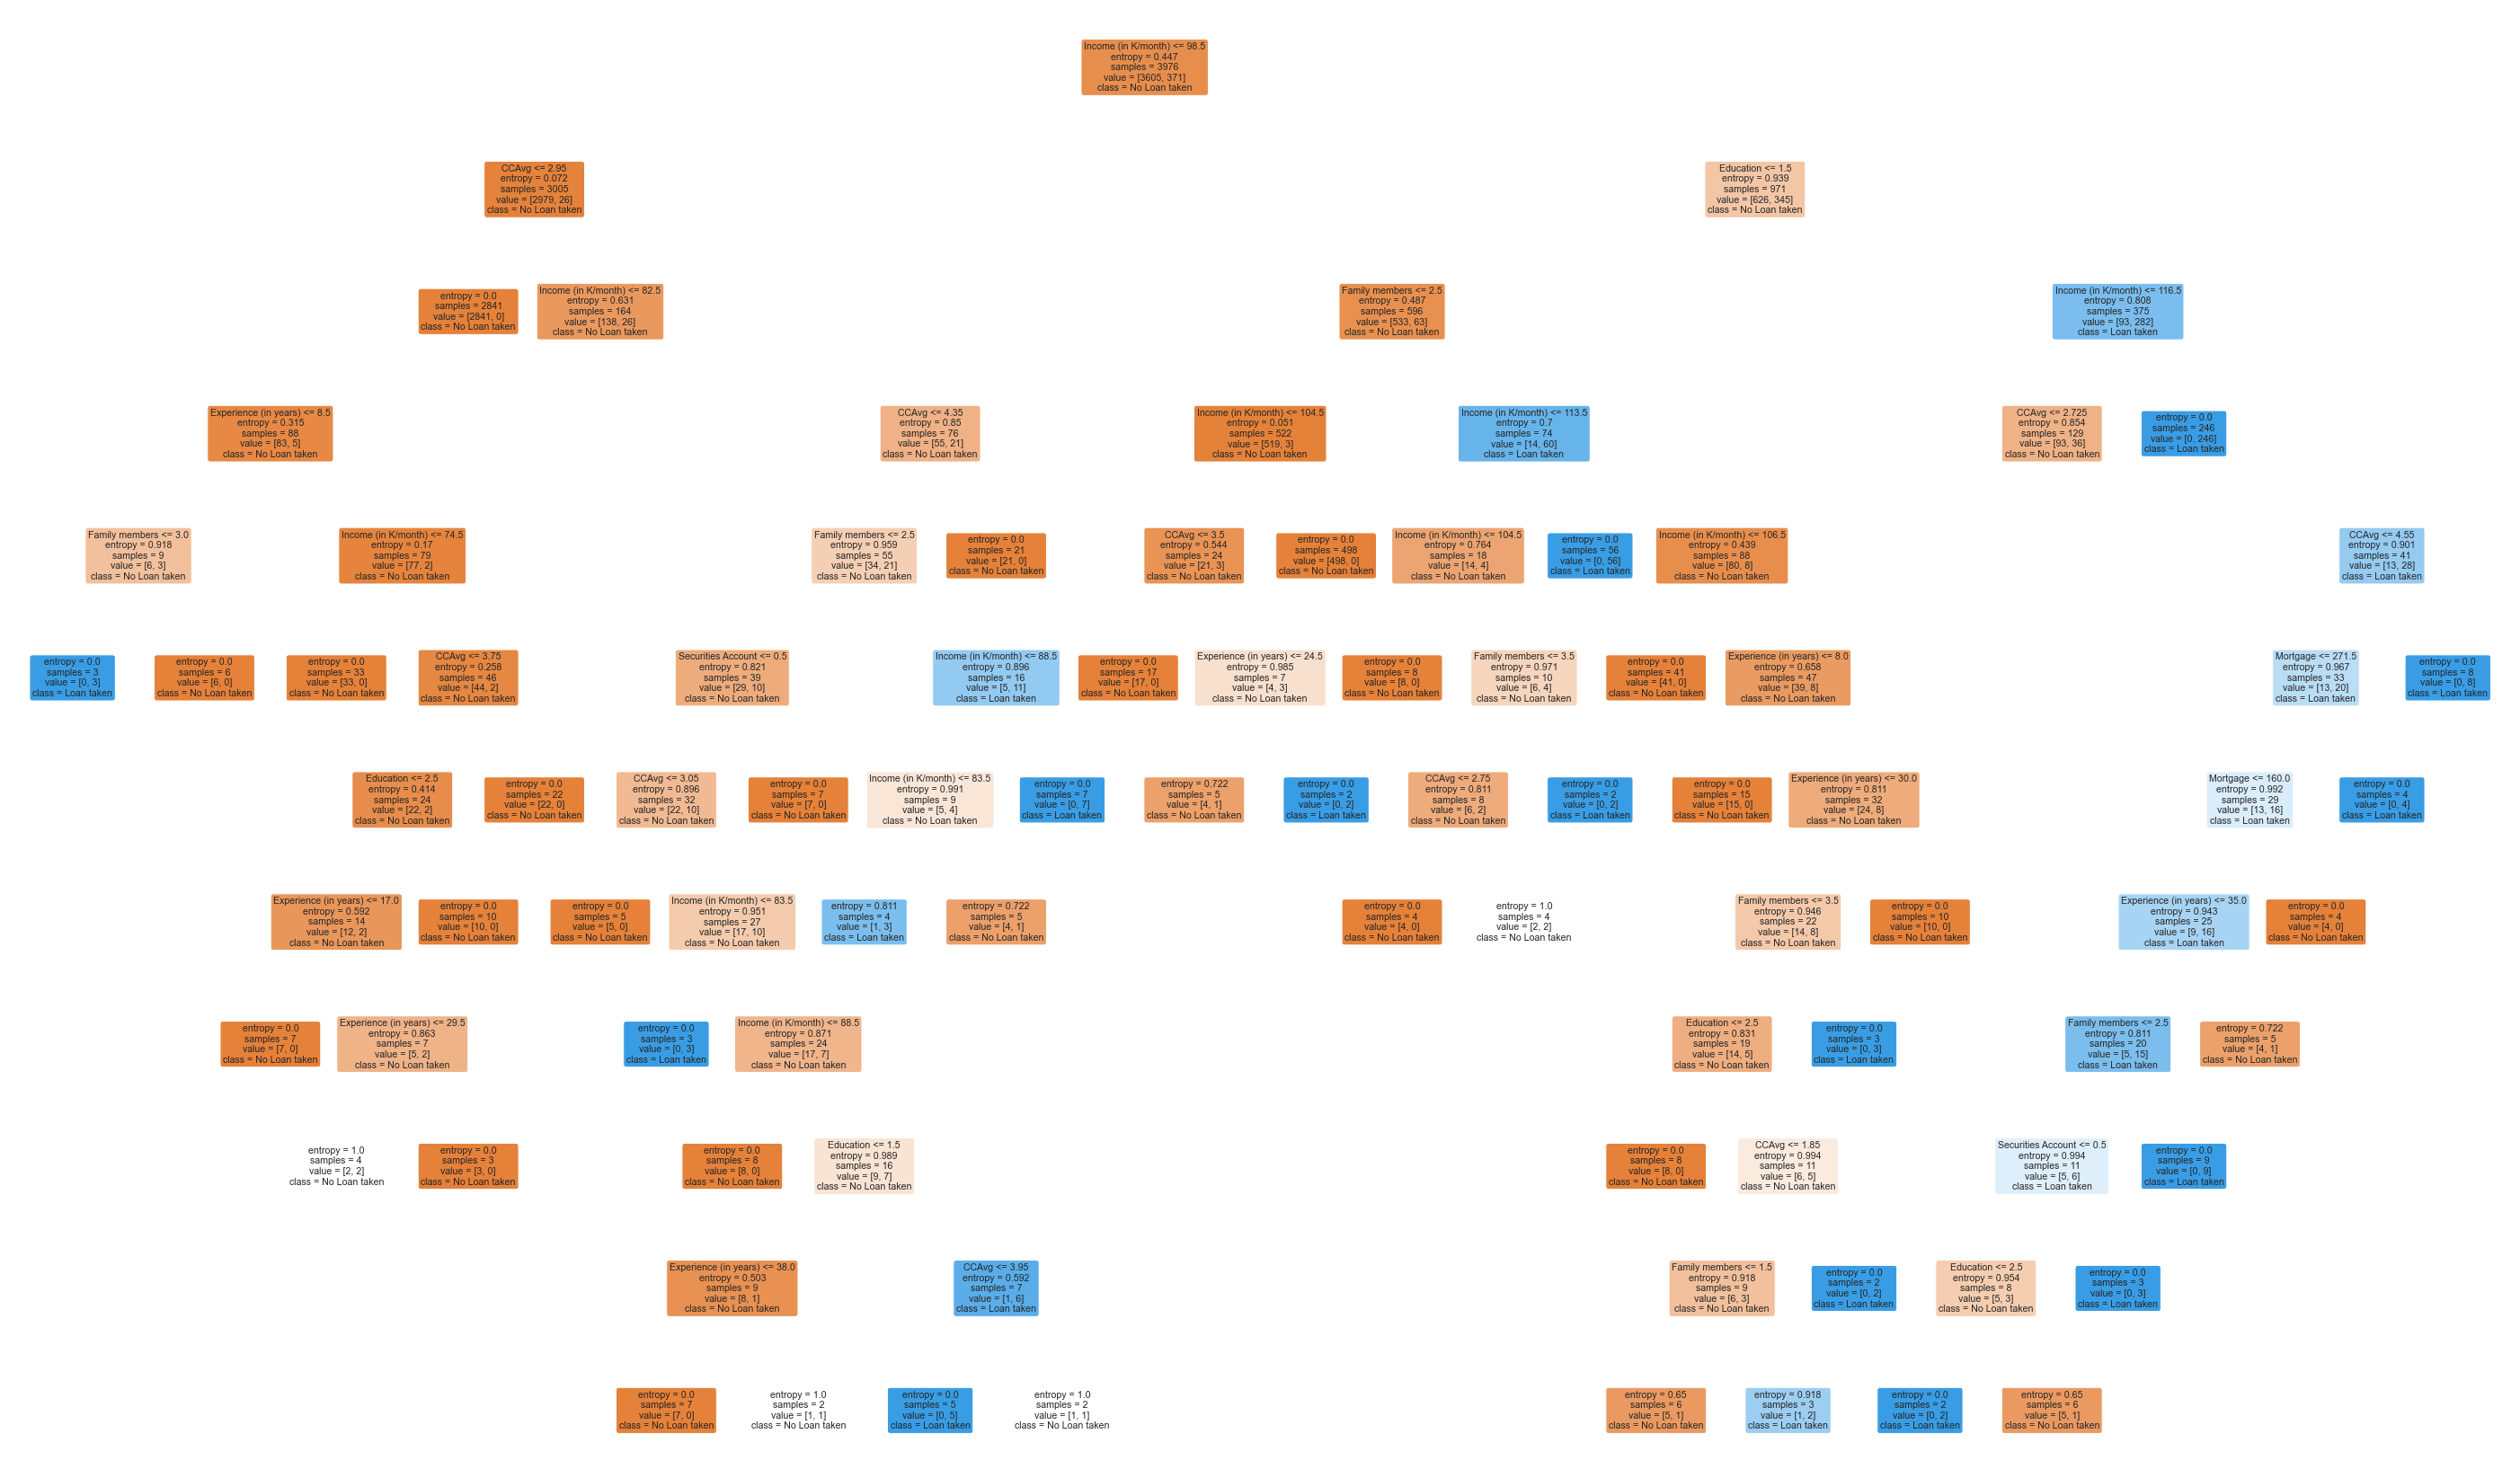

In [89]:
#Create a tree on decision tree dt1
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(dt1,
                   feature_names=X.columns,
                   class_names=['No Loan taken', "Loan taken"],
                   filled=True, rounded=True)

In [88]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,n_jobs=2, random_state=23,max_depth = 18)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_3=clf.predict(X_test)

# f1 score
score_4 = fbeta_score(y_test, y_pred_3, beta=2)

# print
print (score_4)

0.8301526717557252


In [126]:
# Random forest model with f2-score as 0.8301526717557252
confusion_matrix(y_test, y_pred_3)

array([[885,   1],
       [ 22,  87]], dtype=int64)

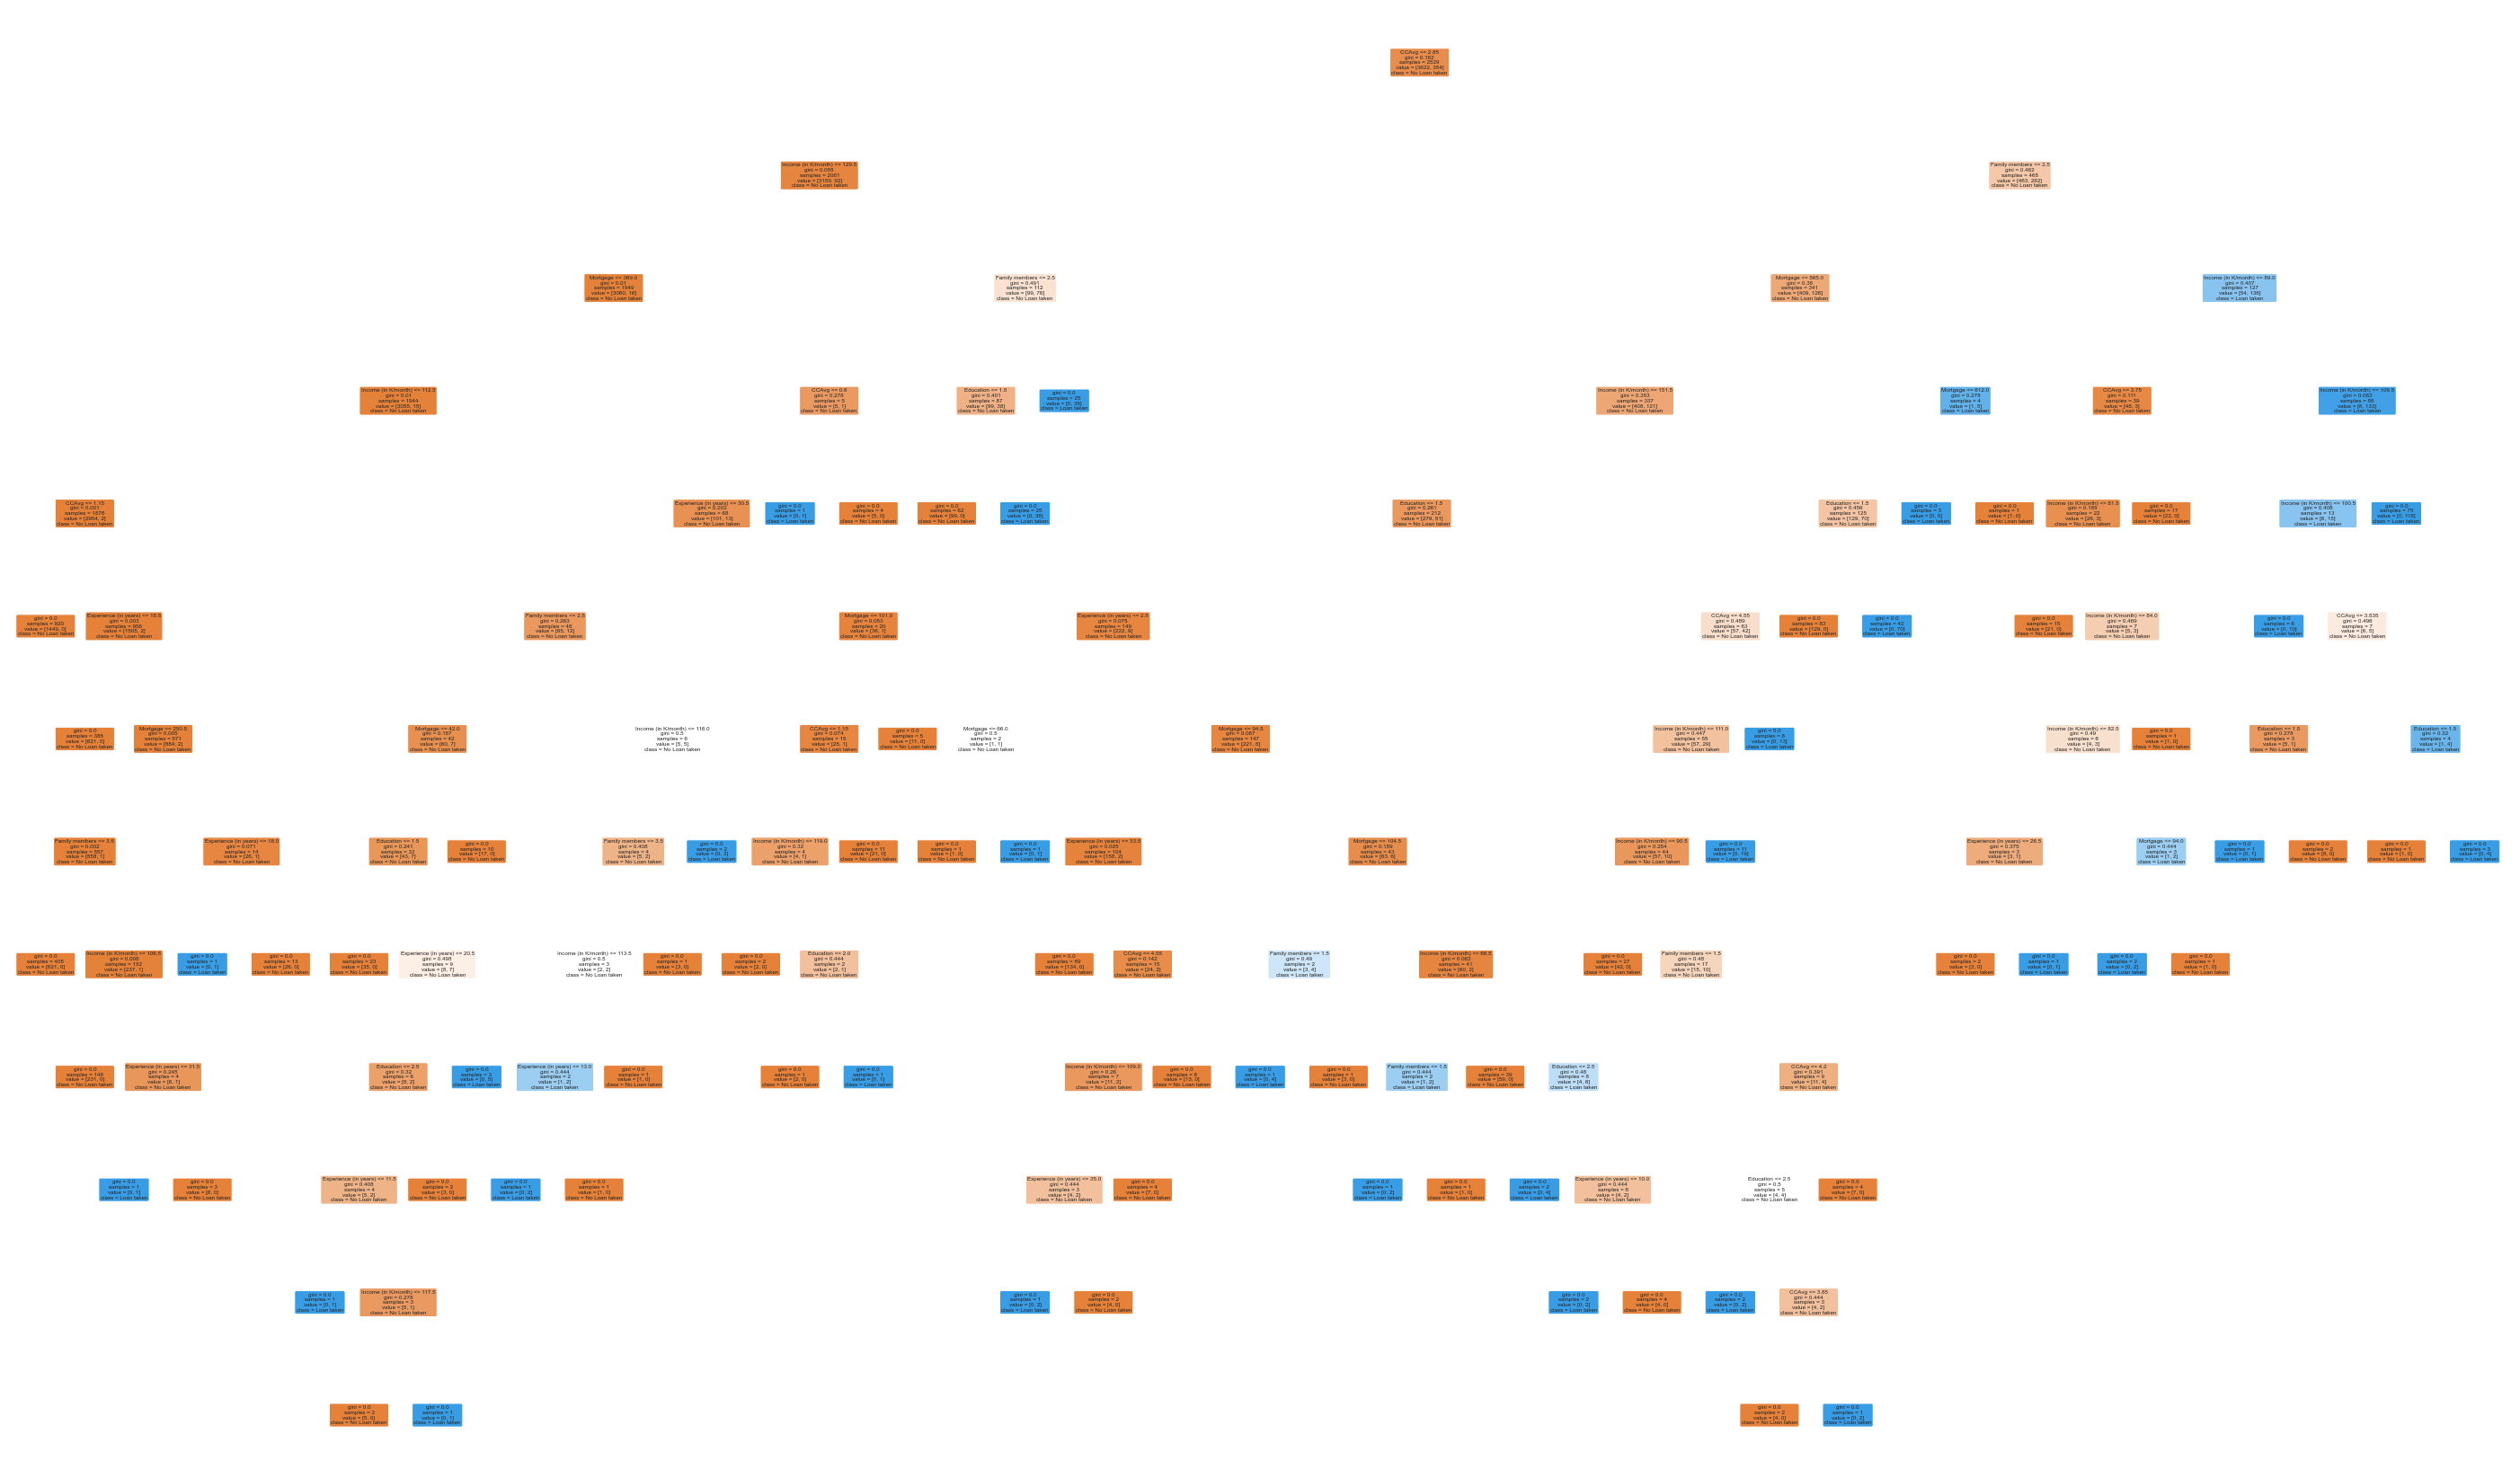

In [95]:
#Create a tree on random forest clf first decision tree
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(clf.estimators_[0],
                   feature_names=X.columns,
                   class_names=['No Loan taken', "Loan taken"],
                   filled=True, rounded=True)

In [91]:
# we will choose decision tree model with f2-score as 0.892193308550186
confusion_matrix(y_test, y_pred)

array([[880,   6],
       [ 13,  96]], dtype=int64)